<h2> Distribuciones de probabilidad de v.a. continuas. Versión general</h2>

Si $X$ es una v.a. continua, la forma en la que especificamos sus propiedades es a través de su <strong>función de distribución</strong> $F_X(t)=P(X\leq t)$. Esta función permite todo tipo de cálculos sobre las probabilidades asociadas a la variable. 

Es usual definir $F_X$ en términos de otra función: la <strong>densidad de probabilidad</strong> $f_X(x)$. Esto se hace del siguiente modo:
$$F_X(t)=P(X\leq t)=\int_{-\infty}^tf_X(x)dx $$

Las funciones $f_X$ tienen las siguientes propiedades:

* $0\leq f_X(x)\leq 1$ para todo $x\in\mathbb{R}$. <font color="brown">(Esto es análogo a la propiedad $p_i\geq 0$ de la Pmf en el caso de v.a. discretas)</font>

* $\int_{-\infty}^{\infty}f_X(x)dx=1$.  <font color="brown">(Esto es análogo a la propiedad $\sum_{i=1}^{\infty}p_i =1$ de la Pmf en el caso de v.a. discretas)</font>

Análogamente, las funciones $F_X$ tienen las siguientes propiedades:

* $F_X\geq 0$, $F_X$ es monótona creciente.
* $\lim_{t\to-\infty}F_X(t)=0$, $\lim_{t\to\infty}F_X(t)=1$.

Disponer de una función $f_X$ que satisface las condiciones anteriores equivale a definir una v.a. $X$ cuya función de distribución $F_X$ viene dada por $F_X(t)=P(X\leq t)=\int_{-\infty}^tf_X(x)dx$.  

La esperanza y la varianza de la v.a. continua $X$ vienen dadas por las expresiones:
$$\mu = E(X)=\int_{-\infty}^{\infty}xf_X(x)dx$$
$$\sigma_X^2=V(X)=E((X-\mu)^2)= \int_{-\infty}^{\infty}(x-\mu)^2f_X(x)dx$$





<h3> Cómo simular una v.a. continua arbitraria $X$ </h3> 
    
Vamos a crear un programa que simula la variable $X$ cuya función de distribución es $F_X$. Para ello, usamos los siguientes resultados:

<strong> Proposición 1</strong> Sea $X$ una v.a. cuya función de distribución $F_X$ es continua y estrictamente creciente en el rango de la v.a. Definimos $F_X^{-1}(u)=\inf \{x: F_X(x)\geq u\}$. Entonces:

* $F_X^{-1}(u)$ es exactamente el percentil-$u$ de la v.a. $X$. 

* $F_X(F_X^{-1}(u))=u=F_X^{-1}(F_X(u))$ pata todo $u\in [0,1]$.  

*  $U=F_X(X)\sim U([0,1])$ (i.e., la v.a. $U=F_X(X)$ sigue una distribución uniforme en $[0,1]$).

* Si $U\sim U([0,1])$, entonces  $Z=F_X^{-1}(U)\sim X$ (i.e., la v.a. $Z=F_X^{-1}(U)$ sigue la misma distribución que la v.a. $X$).
    
<strong> Demostración. </strong> 

En efecto, las dos primeras afirmaciones son claras. Con respecto a la tercera afirmación, un simple cálculo nos dice que 

$$F_U(t)=P(U\leq t)=P(F_X(X)\leq t)=P(X\leq F_X^{-1}(t))=F_X(F_X^{-1}(t))=t$$

y, por tanto, la v.a. $U=F_X(X)$ se distribuye uniformemente en $[0,1]$.

Finalmente, si $Z=F_X^{-1}(U)$, donde $U\sim U([0,1])$, entonces

$$P(Z\leq t)=P(F_X^{-1}(U)\leq t)=P(U\leq F_X(t))= F_X(t) =P(X\leq t)$$

Esto concluye la demostración. $\Box$

<font color="brown"> Una importante consecuencia de los cálculos anteriores es que gracias a las afirmaciones primera y cuarta de la proposición, sabemos que un método válido para la simulación muestras de una v.a. $X$ consiste en realizar los siguientes dos pasos: </font>
    
<font color="brown">    (a) Generar muestras de una v.a. uniforme (para esto existen multitud de algoritmos que funcionan razonablemente bien), y </font>
    
<font color="brown">    (b) Calcular los percentiles asociados a los valores que se acaban de obtener. Estos percentiles son las muestras de la v.a. $X$ que buscábamos. </font> 

<h2> Trabajando en Python con v.a. continuas generales </h2>
    
Veamos cómo se usa Python para estudiar las v.a. continuas cuando la función de densidad nos la dan explícitamente. 

In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter

### Antes de ejecutar esto, es necesario hacer 
## pip install empiricaldist 
## en Terminal
from empiricaldist import Pmf
from scipy.integrate import quad
import matplotlib.pyplot as plt

<strong> Ejemplo </strong> Considera la v.a $X$ cuya función de densidad es 
$$f_X(x)=\left\{\begin{array}{llll} \frac{x^2}{9} & x\in [0,3]\\
0 & \text{ x\not\in [0,3]}\end{array}\right.$$
* Definir $f_X$ con Python. Dibujar su gráfico. Comprobar que en efecto es una función densidad de probabilidad.
* Definir $F_X$. Calcular $P(1.5<X<2)$. 
* Calcular la media y la desviación típica de $X$
* Calcular los quartiles $Q_1,Q_2,Q_3$. (Definir una función que calcule los cuantiles y usarla para calcular $Q_1,Q_2,Q_3$. 
* ¿Cuáles serían los valores atípicos de la v.a. $X$?
* Haz un programa que simule la v.a. $X$. Calcula 10000 datos con ese programa y compara el histograma, media, varianza, etc de estos datos con los resultados de los apartados anteriores.

In [2]:
# Definimos f_X(x), que denotamos por f(x)
def f(x):
    if x <= 0:
        return 0
    elif x>3:
        return 0
    return x**2 / 9

# Para poder hacer representaciones gráficas, y para calcular integrales, vectorizamos f
def f_vec(val):
    result=[]
    for _ in val:
        result.append(f(_))
    return result

#f_vec = np.vectorize(f)

[f_vec([0,1,2,3,4]),[f(0),f(1),f(2),f(3),f(4)]]

[[0, 0.1111111111111111, 0.4444444444444444, 1.0, 0],
 [0, 0.1111111111111111, 0.4444444444444444, 1.0, 0]]

In [3]:


# Definimos F_X(x) (la denotamos por F(x)): 

def F(x):
    result, _ = quad(f, 0, x)  
    ## quad(f,0,x) da dos valores.
    ## El primero es la integral, el segundo una estimación del error. 
    ## Nos quedamos con el primero.
    return result

# Vectorizamos la función F(x) -para las gráficas.


F_vec=np.vectorize(F)

[F_vec([0,1,2,3,4]),[F(0),F(1),F(2),F(3),F(4)]]

[array([0.        , 0.03703704, 0.2962963 , 1.        , 1.        ]),
 [0.0, 0.037037037037037035, 0.2962962962962963, 1.0, 1.0]]

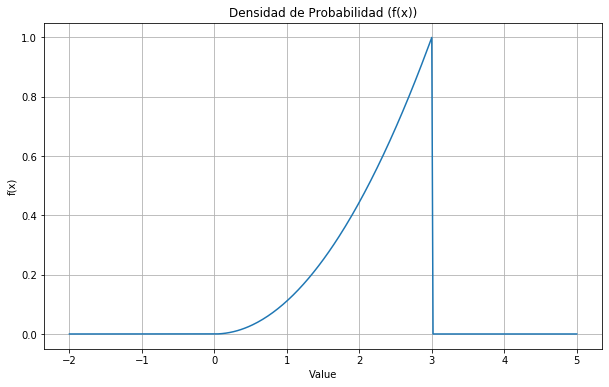

In [4]:
x_vals =np.linspace(-2, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vec(x_vals),  label='f(x)')
#plt.scatter(x_vals, f_vec(x_vals), color='r')
plt.title('Densidad de Probabilidad (f(x))')
plt.xlabel('Value')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

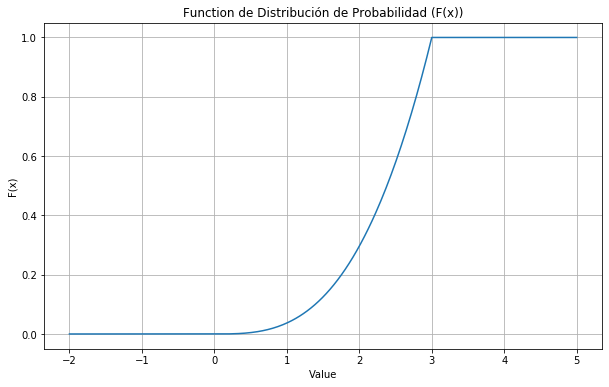

In [5]:
x_vals =np.linspace(-2, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, F_vec(x_vals),  label='F(x)')
#plt.scatter(x_vals, f_vec(x_vals), color='r')
plt.title('Function de Distribución de Probabilidad (F(x))')
plt.xlabel('Value')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

El dibujo de $F_X$ nos confirma que hemos definido una función de distribución y, por tanto, que la función $f_X$ es una función densidad de probabilidad. 

* La probabilidad que nos piden es $P(1.5<X<2)=F_X(2)-F_X(1.5):


In [6]:
F(2)-F(1.5)

0.17129629629629628

Vamos a calcular $\mu=E(X)$, $\sigma_X=V(X)$, y $\sigma_X$:

In [7]:
# Esperanza:
mu,_=quad(lambda x:x*f(x),0,3)
mu

2.2499999999999996

In [8]:
# Varianza:
var,_=quad(lambda x:((x-mu)**2)*f(x),0,3)
var

0.33749999999999997

In [9]:
# Desviación típica
sigma=var**0.5
sigma

0.5809475019311126

Para calcular cuantiles (o percentiles) es necesario resolver ciertas ecuaciones, para lo cual necesitamos importar un paquete específico llamado brentq (hay otros, como fsolve, pero este es muy eficiente y robusto). Lo importamos: 

In [10]:
import numpy as np
from scipy.optimize import brentq 

Por definición, $\alpha$ es el percentil-$p$ (donde $0<p<1$) si $$P(X\leq \alpha)=p.$$ Ahora bien, esto se reescribe como $F_X(\alpha)=p$ o, si se quiere, como $F_X(\alpha)-p=0$. Por tanto, el percentil-$p$ se obtiene de resolver la ecuación:
$$F_X(t)-p=0$$
Veamos cómo hacerlo con Python:

In [12]:
# Cálculo de percentiles
def percentile(p):
    per = brentq(lambda x: F(x) - p, 0, 3)  # Root-finding in the range [0, 3]
    return per

# Vectorizamos la función percentile
percentile_vectorized = np.vectorize(percentile)

Calculemos, pues, los cuartiles:

In [13]:
cuartiles = percentile_vectorized([0.25, 0.5, 0.75])
print(cuartiles)

[1.88988157 2.38110158 2.72568089]


Vamos a crear un programa que simula la variable $X$. 


Para ello, necesitamos generar una v.a uniforme en [0,1] y luego tomar los percentiles correspondientes. 

En efecto, si 

In [15]:
# Generamos 10,000 números aleatorios entre 0 y 1
random_values = np.random.uniform(0, 1, 10000)

# Calculamos los percentiles asociados a estos valores aleatorios que hemos generado
datos = percentile_vectorized(random_values)

In [16]:
np.histogram(datos, bins=30, range=None, density=False, weights=None)

(array([  3,  10,  28,  18,  39,  50,  59,  66,  89, 122, 145, 188, 192,
        205, 233, 310, 306, 335, 377, 431, 501, 487, 579, 613, 631, 741,
        720, 809, 810, 903]),
 array([0.1502734 , 0.2452605 , 0.34024759, 0.43523469, 0.53022179,
        0.62520888, 0.72019598, 0.81518307, 0.91017017, 1.00515726,
        1.10014436, 1.19513145, 1.29011855, 1.38510565, 1.48009274,
        1.57507984, 1.67006693, 1.76505403, 1.86004112, 1.95502822,
        2.05001531, 2.14500241, 2.23998951, 2.3349766 , 2.4299637 ,
        2.52495079, 2.61993789, 2.71492498, 2.80991208, 2.90489917,
        2.99988627]))

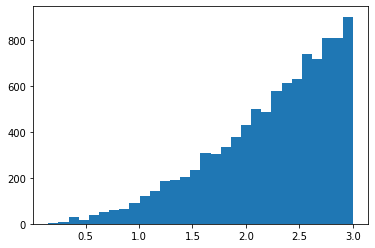

In [17]:
plt.hist(datos, bins=30, range=None, density=False, weights=None)
plt.show()

In [19]:
# Comparamos los valores teóricos y empíricos de la media, la varianza y la desviación típica

print(f"Media muestral: {np.mean(datos)}, Media teorica: {mu}")
print(f"Varianza muestral: {np.var(datos)}, Varianza teorica: {var}")
print(f"Desv. tipica empirica: {np.std(datos)}, Des. tipica teorica: {sigma}")

# Cuartiles empíricos (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Cuartiles empiricos (25%, 50%, 75%):", Q)

# Cuartiles teóricos:
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Cuartiles teóricos (25%, 50%, 75%):", percentiles)

Media muestral: 2.2440566643545794, Media teorica: 2.2499999999999996
Varianza muestral: 0.33617539396498275, Varianza teorica: 0.33749999999999997
Desv. tipica empirica: 0.579806341777134, Des. tipica teorica: 0.5809475019311126
Cuartiles empiricos (25%, 50%, 75%): [1.89013193 2.37101089 2.71768082]
Cuartiles teóricos (25%, 50%, 75%): [1.88988157 2.38110158 2.72568089]


In [20]:
Q1=np.quantile(datos,0.25)
Q2=np.quantile(datos,0.5)
Q3=np.quantile(datos,0.75)
print([Q1,Q2,Q3])
print(cuartiles)

[1.8901319283108695, 2.371010885207381, 2.717680818402451]
[1.88988157 2.38110158 2.72568089]
